<font size = "5"> **[Diffraction Tools](../1_Diffraction_Tools.ipynb)** </font>

<hr style="height:2px;border-top:4px solid #FF8200" />


#  Analyzing Spot Diffraction Pattern


[<img src=https://www.coeuscreativegroup.com/wp-content/uploads/2020/04/download-button.png, width=125>](https://raw.githubusercontent.com/pycroscopy/pyTEMlib/main/notebooks/Diffraction/D2_Diffraction_Spots.ipynb) 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/pycroscopy/pyTEMlib/blob/main/notebooks//Diffraction/D2_Diffraction_Spots.ipynb)
    
    

part of 

<font size = "5"> **[pyTEMlib](https://pycroscopy.github.io/pyTEMlib/about.html)**</font>

a [pycroscopy](https://pycroscopy.github.io/pycroscopy/about.html) ecosystem package


Notebook by Gerd Duscher, 2025

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
The University of Tennessee, Knoxville

Model based analysis and quantification of data acquired with transmission electron microscopes


## Content
An introduction into **diffraction_tools** and how to use the functions in this package to 
index spot diffraction pattern of **single crystal** sample areas.

The scope of this notebook includes calculation and plotting of 
- allowed, forbidden and dynamically activated Bragg reflections,
- Kikuchi- and HOLZ-lines.

The diffraction vectors are given in polar coordinates and internally in Å or 1/Å because that is the base unit of the ase (atomic simulation evironment) package. The package ase is the crystallography package used in pyTEMlib and allows easy conversion to MD and DFT calculations as well as abTEM image and diffraction simulations. Please note that we often plot in the for microscopy more convenient units of nm and 1/nm.


An explanation on the physcial background can be found in the *[Diffraction](https://gduscher.github.io/MSE672-Introduction-to-TEM/diffraction/ch2-00-diffraction/)* chapter of MSE672-Introduction to TEM


## Install pyTEMlib

If you have not done so in the [Introduction Notebook](../0_pyTEMlib.ipynb), please test and install [pyTEMlib](https://github.com/gduscher/pyTEMlib) and other important packages with the code cell below.



## Load relevant python packages
### Check Installed Packages

In [73]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install git+https://github.com/pycroscopy/pyTEMlib.git@main -q --upgrade

if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install numpy==1.24.4
print('done')

done


### Load the plotting and figure packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,

we will use pyTEMlib - especially:
* diffraction_tools library.



In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
%matplotlib  widget
import matplotlib.pyplot as plt
import numpy as np
import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()

# Import libraries from the pyTEMlib
%load_ext autoreload
%autoreload 2
sys.path.insert(0, '../../')
import pyTEMlib

__notebook_version__ = '2025.12.12'
print('pyTEM version: ', pyTEMlib.__version__)
print('notebook version: ', __notebook_version__)

pyTEM version:  0.2026.1.2
notebook version:  2025.12.12



## Define Crystal

Define a Crystal as an ase object.
 
That allows for easy access to things like reciprocal unit cells (*atoms.cell.reciprocal()*)

With the provided crystal tools it is straight forward to change to 'Gold', 'graphite', 'Pt', or any other supported crystals. Adding structruees with POSCAR or cif files is also supported.

In [21]:
#Initialize the dictionary with all the input
atoms = pyTEMlib.crystal_tools.structure_by_name('silicon')
print(atoms)
import ase.visualize
ase.visualize.view(atoms*[4,4,1], viewer='x3d')


Lattice(symbols='Si8', pbc=True, cell=[5.43088, 5.43088, 5.43088])


## Plot Diffraction Pattern
For a minimum we need the zone_axis in Miller indices and the acceleration voltage fo the TEM.
We pack those information in a dictionary and run *get_bragg_reflections* from *diffraction_tools*

> Note:
>
> We calculate the Bragg reflections in polar coordinates.

Of the 2076 possible reflection 404 are allowed.
Of those, there are 56 in ZOLZ  and 348 in HOLZ
Of the 98 forbidden reflection in ZOLZ  20 can be dynamically activated.


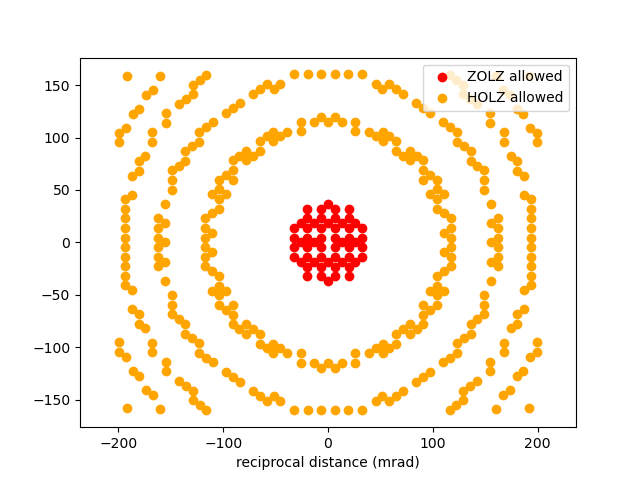

In [24]:
# --------------- INPUT ------------------------
zone_hkl = np.array([1, 1, 0])
hkl_max = 35  #  maximum allowed Miller index
sg_max = 0.03   # 1/Ang  maximum allowed excitation error

acceleration_voltage = 200.0 * 1000.0 #V

rotation = np.radians(0)  # rotation of diffraction pattern
# -------------------------------------------

tags = {'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'Sg_max': sg_max,
        'mistilt_alpha': np.radians(0),
        'convergent_angle':10,
        'acceleration_voltage':  acceleration_voltage}

diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 

# Simple Plot
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

x = r *np.cos(phi+rotation)*1000
y = r * np.sin(phi+rotation)*1000


plt.figure()
plt.scatter(x[ZOLZ], y[ZOLZ], label='ZOLZ allowed', c='r')
plt.scatter(x[HOLZ], y[HOLZ], label="HOLZ allowed", c ='orange')
plt.axis('equal')
plt.xlabel('reciprocal distance (mrad)');
plt.legend();

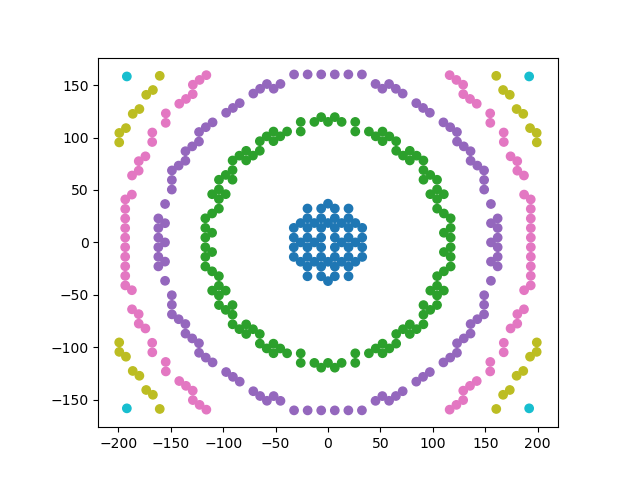

In [25]:
#####################
# Plot ZOLZ SAED Pattern #
#####################

spots = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['allowed']['g'])

plt.figure()
plt.scatter(spots[:,0], spots[:, 1], cmap='tab10', c=diff_dict['allowed']['Laue_Zone'])
plt.gca().set_aspect('equal')

### Allowed, Forbidden and Dynamically-Activated Reflections

We can now plot allowed forbidden and dynamically activated reflections independently.

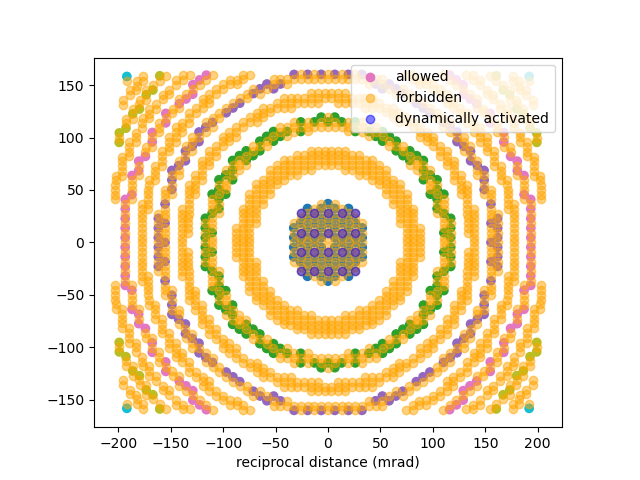

In [31]:
# ---- Input -----
rotation = np.radians(0)
# ----------------

spots_alowed = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['allowed']['g'], rotation=rotation)
spots_forbidden = pyTEMlib.diffraction_tools.plotting_coordinates(diff_dict['forbidden']['g'], rotation=rotation)
spots_activated = (spots_forbidden[diff_dict['forbidden']['ZOLZ']])[diff_dict['forbidden']['dynamically_activated']]
plt.figure()
plt.scatter(spots_alowed[:,0], spots_alowed[:, 1], cmap='tab10', c=diff_dict['allowed']['Laue_Zone'], label='allowed')
plt.scatter(spots_forbidden[:,0], spots_forbidden[:, 1], c='orange', alpha=0.5, label='forbidden')
plt.scatter(spots_activated[:,0], spots_activated[:, 1], c='blue', alpha=0.5, label='dynamically activated')

plt.gca().set_aspect('equal')

activated = (diff_dict['forbidden']['dynamically_activated'])

plt.xlabel('reciprocal distance (mrad)')
plt.legend();

### Plotting in Polar Coordinates

Like for ring-diffraction pattern, it is illustrative to look at the diffraction pattern in polar coordinates.

You will notece that we internally use only polar cooredinates.

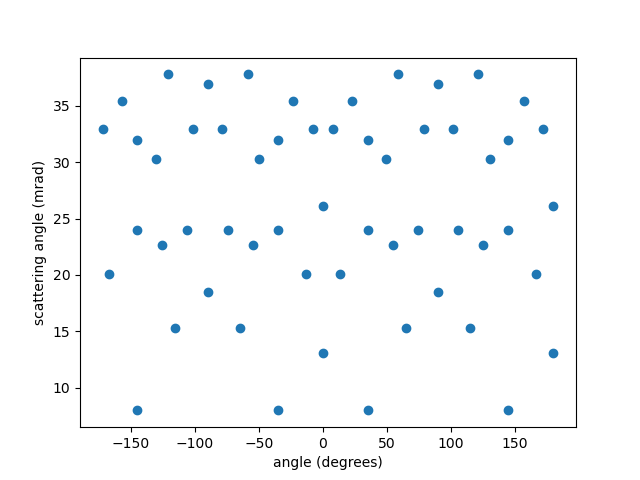

In [27]:
# ---- Input -----
rotation = np.radians(-10)
# ----------------
ZOLZ = diff_dict['allowed']['ZOLZ']
HOLZ = diff_dict['allowed']['HOLZ']
r = diff_dict['allowed']['g'][:, 0]
phi = diff_dict['allowed']['g'][:, 1]

plt.figure()
plt.scatter( np.degrees(phi)[ZOLZ], r[ZOLZ]*1000)
plt.xlabel('angle (degrees)');
plt.ylabel('scattering angle (mrad)');



### All with pyTEMlib and Mistilt


C:\Users\gduscher\OneDrive - University of Tennessee\GitHub\pyTEMlib\notebooks\Diffraction\../..\pyTEMlib\diffraction_tools\basic.py:375: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = np.arctan(zone[0] / r)
C:\Users\gduscher\OneDrive - University of Tennessee\GitHub\pyTEMlib\notebooks\Diffraction\../..\pyTEMlib\diffraction_tools\diffraction_plot.py:810: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


mistilt
Of the 334 possible reflection 56 are allowed.
Of those, there are 17 in ZOLZ  and 39 in HOLZ
Of the 130 forbidden reflection in ZOLZ  0 can be dynamically activated.


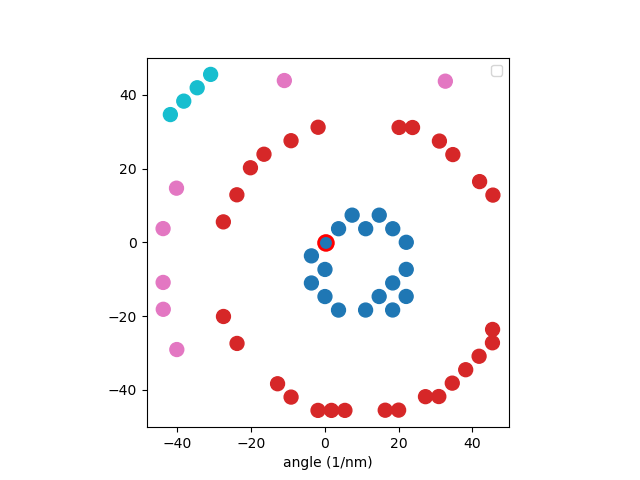

In [32]:
# --------------- INPUT ------------------------
zone_hkl = np.array([1, 0, 0])
hkl_max = 25  #  maximum allowed Miller index
sg_max = 0.01   # 1/Ang  maximum allowed excitation error
mistilt_alpha = 1.5   # degrees
mistilt_beta = 1 # degrees
acceleration_voltage = 200.0 * 1000.0 #V

rotation = np.radians(0)  # rotation of diffraction pattern
# -------------------------------------------

tags = {'zone_hkl': zone_hkl,
        'hkl_max': hkl_max,
        'Sg_max': sg_max,
        'mistilt_alpha': np.radians(mistilt_alpha),
        'mistilt_beta': np.radians(mistilt_beta),
        'acceleration_voltage':  acceleration_voltage}

diff_dict ={}
diff_dict = pyTEMlib.diffraction_tools.get_bragg_reflections(atoms, tags, verbose=True) 
diff_dict.setdefault('output',{})['plot_forbidden']=False
diff_dict['output']['plot_dynamically_allowed']=True

v = pyTEMlib.diffraction_tools.plot_diffraction_pattern(diff_dict, unit='1/nm')


## Conclusion
The scattering geometry provides all the tools to determine which reciprocal lattice points are possible and which of them are allowed.

The diffraction pattern is a projection onto the plane perpendicular to the zone axis. For an easy projection we tilt everything so that the x,y plane  is our projection plane.

Determination of Bragg reflections in polar coordinates allows for easy rotation in plane and calculation of Kikuchi and HOLZ lines.
